<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/Code_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.callbacks import EarlyStopping 
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import pathlib 
import matplotlib.pyplot as plt 

In [3]:
data_dir = '/content/drive/MyDrive/Data 2' 
data_dir = pathlib.Path(data_dir) 

In [6]:
# generators Training 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, 
    validation_split=0.1, 
    subset="training",  
    seed=123, image_size=(256, 256), 
    batch_size=128) 

Found 18 files belonging to 4 classes.
Using 17 files for training.


In [7]:
# Now we are foing to do the validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, 
     validation_split=0.2, 
     subset="validation", 
     seed=123, 
     image_size=(256, 256), 
     batch_size=128) 
 
class_names = train_ds.class_names
print(class_names)

Found 18 files belonging to 4 classes.
Using 3 files for validation.
['Control', 'Tat + cART', 'Tat 10', 'cART']


In [17]:
## Now we are going to construct a CNN model
model = Sequential()
## Convolutional Layers with 32,64 and 128 filters respectively
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
### Activation function= relu and 128 neurons
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_ds,epochs=100,validation_data=val_ds)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 0.2941 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 212ms/step - loss: 0.0000e+00 - accuracy: 0.4706 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 218ms/step - loss: 0.0000e+00 - accuracy: 0.5294 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 211ms/step - loss: 0.0000e+00 - accuracy: 0.5294 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 211ms/step - loss: 0.0000e+00 - accuracy: 0.5294 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 212ms/step - loss: 0.0000e+00 - accuracy: 0.5294 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 218ms/step - loss: 0.0000e+00 - accuracy: 0.5294 - val_loss: 0.0000

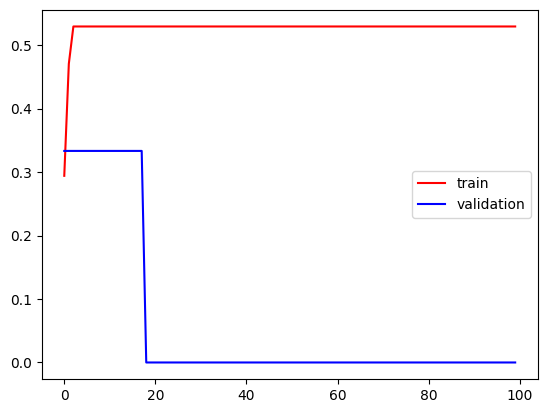

In [21]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


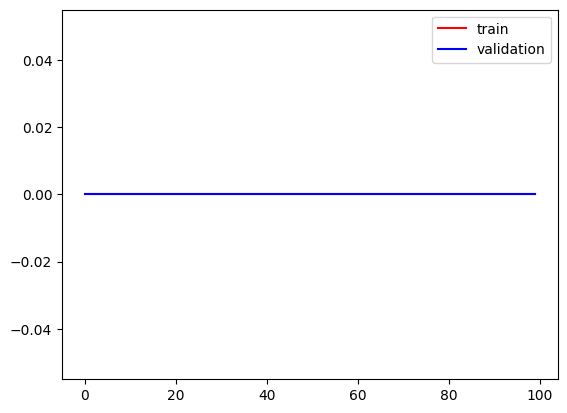

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
